In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
def get_intensities(df, min_ms_level, max_ms_level=None):
    if max_ms_level is None or max_ms_level<=min_ms_level:
        filtered = df[df["MS_LEVEL"]==min_ms_level]
    else:
        filtered = df[df["MS_LEVEL"].between(min_ms_level,max_ms_level, 'both')]
    return np.concatenate(filtered.INTENSITIES.values)

def get_mzs(df: pd.DataFrame, min_ms_level: int, max_ms_level=None):
    if max_ms_level is None or max_ms_level<=min_ms_level:
        filtered = df[df["MS_LEVEL"]==min_ms_level]
    else:
        filtered = df[df["MS_LEVEL"].between(min_ms_level,max_ms_level, 'both')]
    return np.concatenate(filtered.MZS.values)

def get_datapoints(df, min_ms_level, max_ms_level=None):
    if max_ms_level is None or max_ms_level<=min_ms_level:
        filtered = df[df["MS_LEVEL"]==min_ms_level]
    else:
        filtered = df[df["MS_LEVEL"].between(min_ms_level,max_ms_level, 'both')]

    return np.concatenate(filtered.MZS.values), np.concatenate(filtered.INTENSITIES.values)

In [3]:
def save_fig(file_name):
    plt.savefig("figures/{}.png".format(file_name), dpi=300)
    plt.savefig("figures/{}.pdf".format(file_name))
    plt.savefig("figures/{}.svg".format(file_name))

sns.set_theme(font_scale=2, style="white")

In [4]:
method1_df = pd.read_csv("data/spectra_match_1D1A_mce_40AGC.csv", sep="\t")
method2_df= pd.read_csv("data/spectra_match_1D1A_mce_100AGC.csv", sep="\t")
method3_df= pd.read_csv("data/spectra_match_1D1A_mce_100AGC_60000.csv", sep="\t")

In [22]:
method1_df["METHOD"] = "40AGC"
method2_df["METHOD"] = "100AGC"
method3_df["METHOD"] = "100AGC60000Res"

merged_df = pd.concat([method1_df, method2_df, method3_df], ignore_index=True)

merged_df.INTENSITIES = merged_df.INTENSITIES.apply(lambda v: json.loads(v))
merged_df.MZS = merged_df.MZS.apply(lambda v: json.loads(v))
merged_df.PRECURSOR_LIST = merged_df.PRECURSOR_LIST.apply(lambda v: json.loads(v))
merged_df.LIB_INDEX = merged_df.LIB_INDEX.apply(lambda v: json.loads(v))

# put number of data points into meaningful bins
evaluation_bins = [0, 0.5, 1, 2, 3, 4, 6, 10, 20, 50, 100, np.inf]
group_names =     ["0", '1', '2', '3', '4', '5-6', '7-10', '11-20', '21-50', '51-100', '>100']


merged_df["N_DP_SIMPLE"] = pd.cut(merged_df['N_SIGNALS_FILTERED'], bins=evaluation_bins,
                                labels=group_names,
                                  include_lowest=True, right=True)

merged_df

,FILENAME,SCAN_NUMBER,TREE_ID,MS_LEVEL,PRECURSOR_MZ,PRECURSOR_MS2,PRECURSOR_LIST,N_SIGNALS,MAX_MSN,N_PREC,...,MIN_INTENSITY,N_SIGNALS_FILTERED,LIB_INDEX,PRODUCT_NAME,SMILES,EXACT_MASS,ANNOTATED,N_MATCHES,METHOD,N_DP_SIMPLE
0,20220601_pluskal_mce_1D1_A1.mzML,804,1,2,1167.31567,1167.31567,[1167.31567],18,2,0,...,3305.0,1,[],NaN,NaN,NaN,False,0,40AGC,1
1,20220601_pluskal_mce_1D1_A1.mzML,805,1,2,1167.31567,1167.31567,[1167.31567],14,2,0,...,3574.0,2,[],NaN,NaN,NaN,False,0,40AGC,2
2,20220601_pluskal_mce_1D1_A1.mzML,806,1,2,1167.31567,1167.31567,[1167.31567],12,2,0,...,3620.0,0,[],NaN,NaN,NaN,False,0,40AGC,0
3,20220601_pluskal_mce_1D1_A1.mzML,743,2,2,1147.27490,1147.27490,[1147.2749],17,2,0,...,3261.0,1,[],NaN,NaN,NaN,False,0,40AGC,1
4,20220601_pluskal_mce_1D1_A1.mzML,744,2,2,1147.27490,1147.27490,[1147.2749],12,2,0,...,3523.0,1,[],NaN,NaN,NaN,False,0,40AGC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55444,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,595,450,4,95.00867,177.05070,"[177.0507, 106.99969, 95.00867]",33,4,8,...,894.0,1,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,1
55445,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,596,450,4,95.00867,177.05070,"[177.0507, 106.99969, 95.00867]",28,4,8,...,958.0,2,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,2
55446,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,561,450,3,105.06558,177.05070,"[177.0507, 105.06558]",43,4,8,...,944.0,15,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,11-20
55447,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,562,450,3,105.06558,177.05070,"[177.0507, 105.06558]",38,4,8,...,926.0,12,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,11-20


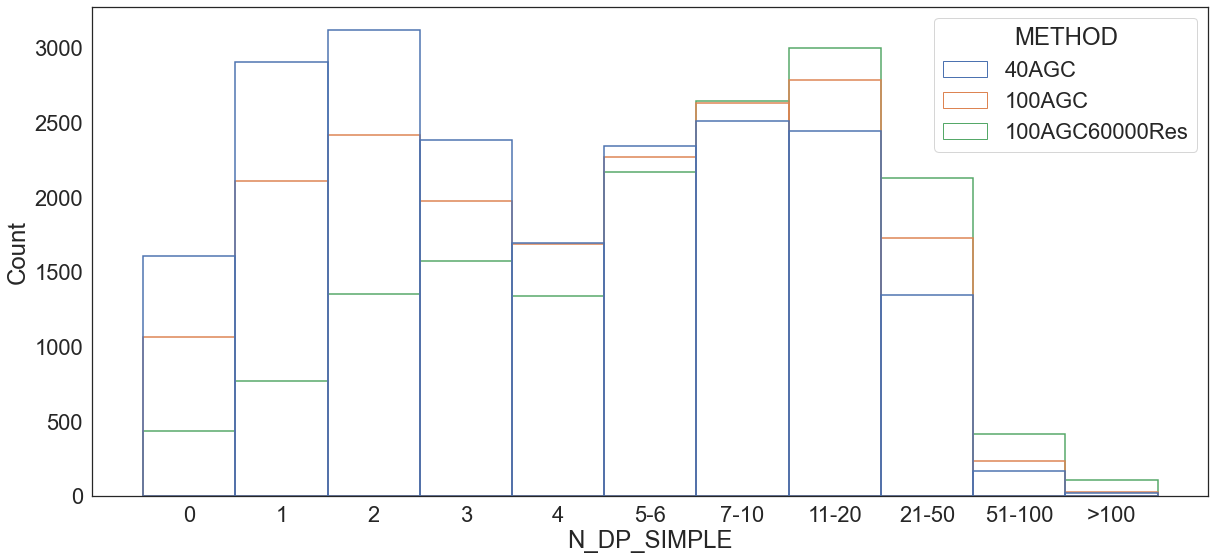

In [12]:
# compare first all spectra
plt.figure(figsize=(20, 9))
ax = sns.histplot(data=merged_df, x="N_DP_SIMPLE", hue="METHOD", fill=False)
# ax.set_ylim(0,3200)
save_fig("n_signals_filtered_categories_all_spectra_pp")

In [23]:
merged_df["METHOD"].value_counts()

40AGC             20550
100AGC            18950
100AGC60000Res    15949
Name: METHOD, dtype: int64

## Filter for unique library matches, for each method, and each precursor mz

In [24]:
# find all with match, keep best spectrum (highest N of signals) for each precursor of each compound
merged_df = merged_df[merged_df["N_MATCHES"] >= 1]
merged_df["FIRST_LIB_INDEX"] = [lib_ids[0] if len(lib_ids)>0 else "" for lib_ids in merged_df['LIB_INDEX']]
merged_df["PRECURSOR_MZ_LOW_RES"] = [round(mz, 2) for mz in merged_df['PRECURSOR_MZ']]
merged_df = merged_df.sort_values('N_SIGNALS_FILTERED', ascending=False).drop_duplicates(['FIRST_LIB_INDEX','PRECURSOR_MZ_LOW_RES', 'METHOD'], keep="first").sort_index()
merged_df

C:\Users\BrungsC\AppData\Local\Temp\ipykernel_16912\567998582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["FIRST_LIB_INDEX"] = [lib_ids[0] if len(lib_ids)>0 else "" for lib_ids in merged_df['LIB_INDEX']]
C:\Users\BrungsC\AppData\Local\Temp\ipykernel_16912\567998582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["PRECURSOR_MZ_LOW_RES"] = [round(mz, 2) for mz in merged_df['PRECURSOR_MZ']]


,FILENAME,SCAN_NUMBER,TREE_ID,MS_LEVEL,PRECURSOR_MZ,PRECURSOR_MS2,PRECURSOR_LIST,N_SIGNALS,MAX_MSN,N_PREC,...,LIB_INDEX,PRODUCT_NAME,SMILES,EXACT_MASS,ANNOTATED,N_MATCHES,METHOD,N_DP_SIMPLE,FIRST_LIB_INDEX,PRECURSOR_MZ_LOW_RES
38,20220601_pluskal_mce_1D1_A1.mzML,275,6,2,584.16455,584.16455,[584.16455],126,3,1,...,[3],Fostemsavir Tris,O=C(N1CCN(C(C2=CC=CC=C2)=O)CC1)C(C3=CN(COP(O)(...,583.158047,True,1,40AGC,51-100,3,584.16
41,20220601_pluskal_mce_1D1_A1.mzML,810,6,2,584.16571,584.16455,[584.16455],60,3,1,...,[3],Fostemsavir Tris,O=C(N1CCN(C(C2=CC=CC=C2)=O)CC1)C(C3=CN(COP(O)(...,583.158047,True,1,40AGC,21-50,3,584.17
51,20220601_pluskal_mce_1D1_A1.mzML,1143,6,3,486.18845,584.16455,"[584.16455, 486.18799]",16,3,1,...,[3],Fostemsavir Tris,O=C(N1CCN(C(C2=CC=CC=C2)=O)CC1)C(C3=CN(COP(O)(...,583.158047,True,1,40AGC,4,3,486.19
79,20220601_pluskal_mce_1D1_A1.mzML,414,8,2,562.12012,562.12012,[562.12012],49,4,7,...,[5],ALK inhibitor 1,O=S(C1=C(NC2=C(Br)C=NC(NC3=C(OC)C=C(N4CCN(C)CC...,561.115771,True,1,40AGC,11-20,5,562.12
81,20220601_pluskal_mce_1D1_A1.mzML,419,8,3,206.14131,562.12012,"[562.12012, 206.14131]",14,4,7,...,[5],ALK inhibitor 1,O=S(C1=C(NC2=C(Br)C=NC(NC3=C(OC)C=C(N4CCN(C)CC...,561.115771,True,1,40AGC,7-10,5,206.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55434,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,564,450,3,117.00294,177.05070,"[177.0507, 117.00294]",68,4,8,...,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,21-50,222,117.00
55437,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,558,450,3,116.03395,177.05070,"[177.0507, 116.03395]",72,4,8,...,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,21-50,222,116.03
55440,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,570,450,3,106.99969,177.05070,"[177.0507, 106.99969]",94,4,8,...,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,21-50,222,107.00
55445,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,596,450,4,95.00867,177.05070,"[177.0507, 106.99969, 95.00867]",28,4,8,...,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,2,222,95.01


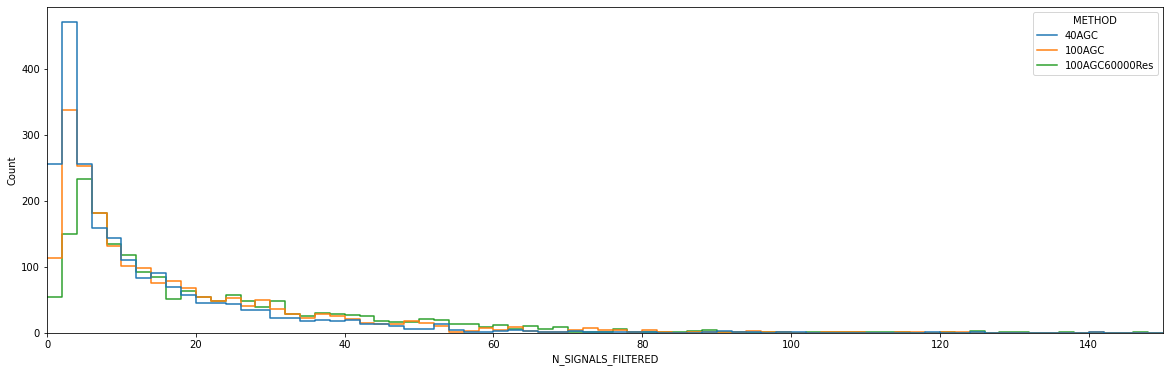

In [10]:
plt.figure(figsize=(20, 6))
ax = sns.histplot(data=merged_df, x="N_SIGNALS_FILTERED", hue="METHOD", binwidth=2, fill=False, element="step")
ax.set_xlim(0,150)
# ax.set_ylim(0,100)
save_fig("histo_signals_gr_3xmin_intensity")

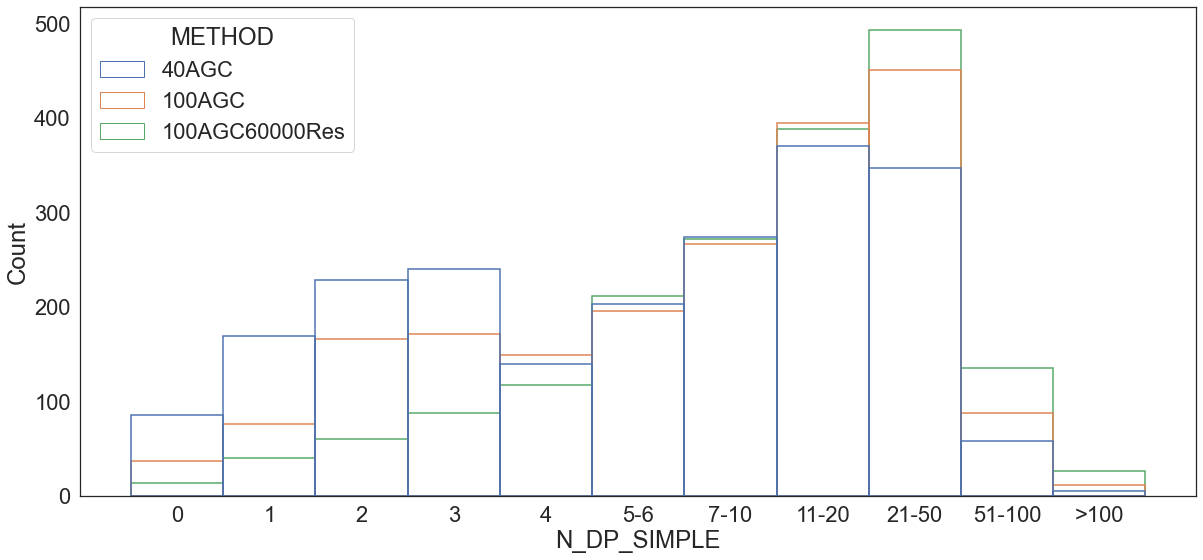

In [14]:
plt.figure(figsize=(20, 9))
ax = sns.histplot(data=merged_df, x="N_DP_SIMPLE", hue="METHOD", fill=False)
save_fig("n_signals_filtered_categories_pp")

In [35]:
merged_df["METHOD"].value_counts()

40AGC             2126
100AGC            2010
100AGC60000Res    1851
Name: METHOD, dtype: int64

In [36]:
best_df = merged_df.sort_values('N_SIGNALS_FILTERED', ascending=False).drop_duplicates(['FIRST_LIB_INDEX', "PRECURSOR_MZ_LOW_RES"], keep="first").sort_index()

In [37]:
best_df

,FILENAME,SCAN_NUMBER,TREE_ID,MS_LEVEL,PRECURSOR_MZ,PRECURSOR_MS2,PRECURSOR_LIST,N_SIGNALS,MAX_MSN,N_PREC,...,LIB_INDEX,PRODUCT_NAME,SMILES,EXACT_MASS,ANNOTATED,N_MATCHES,METHOD,N_DP_SIMPLE,FIRST_LIB_INDEX,PRECURSOR_MZ_LOW_RES
38,20220601_pluskal_mce_1D1_A1.mzML,275,6,2,584.16455,584.16455,[584.16455],126,3,1,...,[3],Fostemsavir Tris,O=C(N1CCN(C(C2=CC=CC=C2)=O)CC1)C(C3=CN(COP(O)(...,583.158047,True,1,40AGC,51-100,3,584.16
51,20220601_pluskal_mce_1D1_A1.mzML,1143,6,3,486.18845,584.16455,"[584.16455, 486.18799]",16,3,1,...,[3],Fostemsavir Tris,O=C(N1CCN(C(C2=CC=CC=C2)=O)CC1)C(C3=CN(COP(O)(...,583.158047,True,1,40AGC,4,3,486.19
185,20220601_pluskal_mce_1D1_A1.mzML,243,15,2,426.21338,426.21338,[426.21338],112,5,11,...,[8],PF-04691502,OCCO[C@@H]1CC[C@@H](N2C(N=C(N)N=C3C)=C3C=C(C4=...,425.206304,True,1,40AGC,51-100,8,426.21
189,20220601_pluskal_mce_1D1_A1.mzML,250,15,3,328.14023,426.21338,"[426.21338, 328.14023]",8,5,11,...,[8],PF-04691502,OCCO[C@@H]1CC[C@@H](N2C(N=C(N)N=C3C)=C3C=C(C4=...,425.206304,True,1,40AGC,2,8,328.14
217,20220601_pluskal_mce_1D1_A1.mzML,263,15,4,226.07220,426.21338,"[426.21338, 269.09134, 226.0722]",17,5,11,...,[8],PF-04691502,OCCO[C@@H]1CC[C@@H](N2C(N=C(N)N=C3C)=C3C=C(C4=...,425.206304,True,1,40AGC,4,8,226.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55434,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,564,450,3,117.00294,177.05070,"[177.0507, 117.00294]",68,4,8,...,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,21-50,222,117.00
55437,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,558,450,3,116.03395,177.05070,"[177.0507, 116.03395]",72,4,8,...,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,21-50,222,116.03
55440,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,570,450,3,106.99969,177.05070,"[177.0507, 106.99969]",94,4,8,...,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,21-50,222,107.00
55445,20220613_100AGC_60000Res_pluskal_mce_1D1_A23.mzML,596,450,4,95.00867,177.05070,"[177.0507, 106.99969, 95.00867]",28,4,8,...,[222],Dencichine,N[C@@H](CNC(C(O)=O)=O)C(O)=O,176.043321,True,1,100AGC60000Res,2,222,95.01


In [30]:
best_df["METHOD"].value_counts()

100AGC60000Res    1472
100AGC             660
40AGC              492
Name: METHOD, dtype: int64

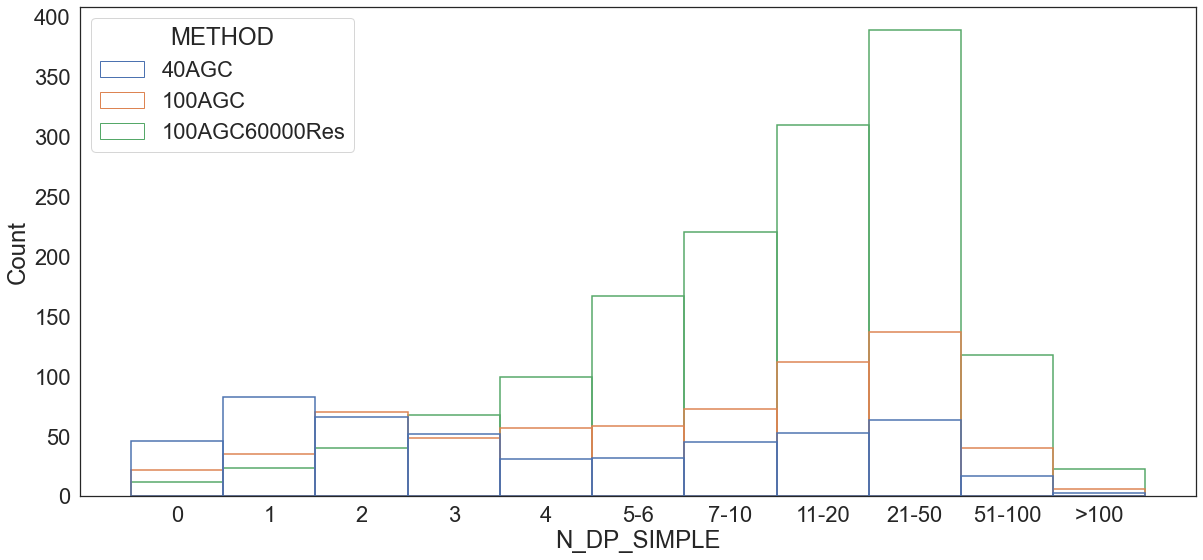

In [32]:
plt.figure(figsize=(20, 9))
ax = sns.histplot(data=best_df, x="N_DP_SIMPLE", hue="METHOD", fill=False)
save_fig("n_signals_best_filtered_categories_pp")